In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Supress Warnings and Deprecations

In [47]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Import Dataset

In [17]:
data = pd.read_csv('C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-3/Lesson 3/bank/bank.csv')

# Examine Data

In [20]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [21]:
data.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [22]:
data['y'] = np.where((data['y'].str.contains('yes', regex=True)), 1, 0)

In [23]:
data.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

<Figure size 720x720 with 0 Axes>

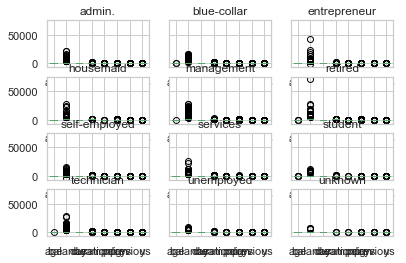

In [24]:
plt.figure(figsize=(10, 10))
data.groupby('job').boxplot()
plt.show()

In [25]:
data.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [26]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.47600088476001
percentage of subscription 11.523999115239992


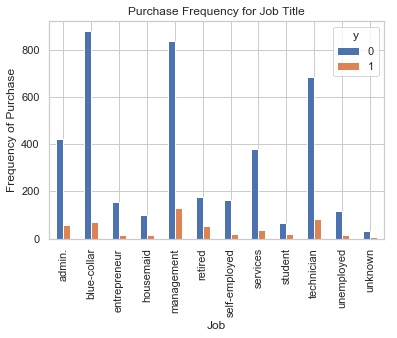

In [27]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

# Create one-hot coding using dummy variables

In [28]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [31]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14',
       'day_15', 'day_16', 'day_17', 'day_18', 'day_19',

In [39]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

# SMOTE algorithm(Synthetic Minority Oversampling Technique):

1. Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [48]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  3938
Number of no subscription in oversampled data 1969
Number of subscription 1969
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


# Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [50]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
j=0
temp =[]
for i in rfe.ranking_:
    if i == 1:
        temp.append(data_final_vars[j])
        j = j+1
temp.remove('y')

In [62]:
trainsize = int(os_data_X.shape[0]/ 2)
X_test  = os_data_X.iloc[trainsize:, :].copy()
X_train = os_data_X.iloc[:trainsize, :].copy()
y_test  = os_data_y['y'][trainsize:]
y_train = os_data_y['y'][:trainsize]

X=os_data_X[temp]


In [95]:
import statsmodels.api as sm
logit_model=sm.Logit(y_test,X_test)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.240526
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1969
Model:                          Logit   Df Residuals:                     1950
Method:                           MLE   Df Model:                           18
Date:                Thu, 06 Jun 2019   Pseudo R-squ.:                  0.6529
Time:                        13:23:49   Log-Likelihood:                -473.60
converged:                       True   LL-Null:                       -1364.6
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0617      0.006      9.758      0.000       0.049       0.074
balance 

# Ridge Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
ridgeregr = linear_model.Ridge(alpha=1, fit_intercept=False) 
result = ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_test, y_test))


0.5696832910176002


# Lasso Regression

In [65]:
lassBig = linear_model.Lasso(alpha=.35,fit_intercept=False)
lassBig.fit(X_train, y_train)
print(lassBig.score(X_test,y_test))

0.22948937863831054


In [86]:
# Storing legend information.
lasso =[]
ridge = []

#Run the model for many alphas.
for lambd in range(1, 50, 1):
    lassBig = linear_model.Lasso(alpha=lambd,fit_intercept=False)
    lassBig.fit(X_train, y_train)
    lassBig_score = lassBig.score(X_test, y_test)
    lasso = np.append(lasso,lassBig_score)
    
    ridgeregr = linear_model.Ridge(alpha=lambd,fit_intercept=False) 
    ridgeregr.fit(X_train, y_train)
    ridgeBig_score = ridgeregr.score(X_test, y_test)
    ridge = np.append(ridge,ridgeBig_score)


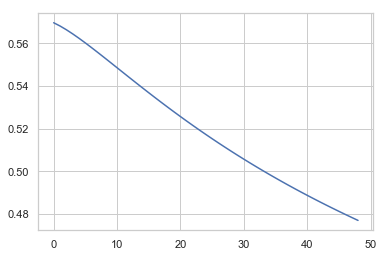

In [89]:
plt.plot(ridge)
plt.show()

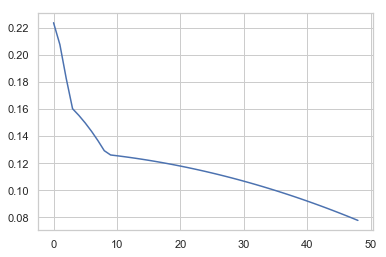

In [90]:
plt.plot(lasso)
plt.show()

In [96]:
df = pd.DataFrame([[max(ridge),max(lasso), 0.6529]],columns =['ridge','lasso','logit'])

In [97]:
df

,ridge,lasso,logit
0,0.569683,0.223772,0.6529
